In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Data Summary

First, we import the data set and take a look at it

In [2]:
house_df = pd.read_csv('data/ready_to_use_dataset.csv')
display(house_df.shape)

(9963, 20)

In [3]:
display(house_df.dtypes)

district                               object
is_incumbent                          float64
name                                   object
party                                  object
percent                               float64
state                                  object
votes                                 float64
won                                     int64
year                                    int64
first_time_elected                    float64
count_victories                         int64
unemployement_rate                    float64
is_presidential_year                  float64
president_can_be_re_elected           float64
president_party                        object
president_overall_avg_job_approval    float64
last_D_house_seats                    float64
last_R_house_seats                    float64
last_house_majority                    object
fundraising                           float64
dtype: object

In [4]:
display(house_df.head())

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
0,District 1,0.0,Ratliff Boon,D,42.1,Indiana,4281.0,1,1824,1824.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,District 1,1.0,Ratliff Boon,D,42.8,Indiana,5202.0,1,1826,1824.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,District 1,1.0,Ratliff Boon,D,52.2,Indiana,7272.0,1,1828,1824.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,District 1,0.0,John Law,D,49.1,Indiana,10868.0,0,1830,1860.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,District 1,1.0,Ratliff Boon,D,50.9,Indiana,11280.0,1,1830,1824.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
display(house_df.describe())

,is_incumbent,percent,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,fundraising
count,9851.000000,9948.000000,9905.000000,9963.000000,9963.000000,5518.000000,9963.000000,8984.000000,9861.000000,9861.000000,8903.000000,9861.000000,9861.00000,2.802000e+03
mean,0.445335,50.896799,101023.546694,0.527953,1991.965171,1987.027184,0.961257,6.196438,0.486766,0.599534,0.489888,219.581990,210.76189,1.032118e+06
std,0.497028,19.803514,55170.668647,0.499243,31.283548,32.730348,1.825532,2.164187,0.499850,0.490018,0.064751,36.303992,34.77473,1.454690e+06
min,0.000000,0.000000,0.000000,0.000000,1824.000000,1824.000000,0.000000,2.700000,0.000000,0.000000,0.395000,38.000000,86.00000,-3.469651e+04
25%,0.000000,36.100000,59082.000000,0.000000,1982.000000,1974.000000,0.000000,4.500000,0.000000,0.000000,0.480000,194.000000,180.00000,7.217875e+04
50%,0.000000,50.200000,94660.000000,1.000000,2004.000000,2002.000000,0.000000,5.700000,0.000000,1.000000,0.480000,205.000000,228.00000,7.825413e+05
75%,1.000000,64.200000,136548.000000,1.000000,2012.000000,2012.000000,1.000000,7.300000,1.000000,1.000000,0.494000,253.000000,241.00000,1.443633e+06
max,1.000000,100.000000,322514.000000,1.000000,2018.000000,2018.000000,17.000000,19.000000,1.000000,1.000000,0.701000,334.000000,303.00000,3.410465e+07


In [6]:
print(len(house_df))

9963


Our dataset has 10065 observations and 20 predictors. 

In [7]:
msk=(house_df['year']==2018) & (house_df['state']=='Arkansas') & (house_df['district']=='District 4')
house_df[msk]

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
9221,District 4,0.0,Hayden Shamel,D,31.2,Arkansas,61718.0,0,2018,NaN,0,3.7,0.0,1.0,R,0.395,194.0,241.0,R,NaN
9222,District 4,1.0,Bruce Westerman,R,66.8,Arkansas,132253.0,1,2018,2014.0,2,3.7,0.0,1.0,R,0.395,194.0,241.0,R,1330040.74


In [8]:
#check that we always have one (and only one) winner
house_df_grouped=house_df.groupby(['year', 'state', 'district'])['won'].sum().reset_index(drop=False)
house_df_grouped[house_df_grouped['won']!=1].head()

,year,state,district,won


In [26]:
def deductPartisanship(trainData, HistYears=50):
    #compute the prevalence of one party win against the other
    house_df_all_districts=trainData[(trainData['won']==1) & (trainData['year']>=(2018-HistYears)) & (trainData['year']!=2018)].groupby(['state', 'district'])['party'].sum().reset_index(drop=False)
    house_df_all_districts['R_occurence']=house_df_all_districts['party'].str.count('R')/house_df_all_districts['party'].str.len()

    avgHistData=house_df_all_districts['party'].str.len().mean() #Average amount of historical data per district
    histDataThreshold=avgHistData/2

    print('In average, in the last {} years, we have data from the last {:.1f} elections in each district.\nSome districts are "new" as they exist only after a redistribution for a new congress. \nWe evaluate the partisanships of districts which exist at least since the last {:.1f} elections'.format(HistYears, avgHistData, histDataThreshold))

    #3=traditionally Republican district
    #2=traditionally Democratic district
    #1=swing district
    #0=Recent district (Not enough historical data)
    house_df_all_districts['partisanship']=(house_df_all_districts['party'].str.len()>=histDataThreshold)*(
                      (house_df_all_districts['R_occurence']>(2/3))*3
                    + (house_df_all_districts['R_occurence']<=(1/3))*2
                    + ((house_df_all_districts['R_occurence']>(1/3))
                      &(house_df_all_districts['R_occurence']<=(2/3)))*1
                    )
    return house_df_all_districts[['state', 'district', 'partisanship']]

def assignPartisanship(train_df, test_df):
    return test_df.join(deductPartisanship(train_df).set_index(['state', 'district']), on=['state', 'district'])


In [10]:
#show that we have to remove first_time_elected if it's in the future, compared to current observation
house_df[(house_df['year']-house_df['first_time_elected']<=0)&(house_df['name']=='John Law')]

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
3,District 1,0.0,John Law,D,49.1,Indiana,10868.0,0,1830,1860.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,District 1,0.0,John Law,D,55.7,Indiana,13476.0,1,1860,1860.0,0,NaN,1.0,1.0,R,NaN,98.0,116.0,R,NaN


In [27]:
def preprocess(train_df, df):
    out_df=assignPartisanship(train_df, df).copy()
    out_df['first_time_elected']=out_df['year']-out_df['first_time_elected']
    out_df.loc[out_df['first_time_elected']<0, 'first_time_elected']=np.NaN
    out_df['Log10fundraising']=out_df['fundraising']
    out_df.loc[out_df['Log10fundraising']<=0, 'Log10fundraising']=np.NaN
    out_df['Log10fundraising']=np.log10(out_df['fundraising']) #take the log10
    return out_df[['is_incumbent',
                   'party', 
                   'first_time_elected', 
                   'count_victories', 
                   'unemployement_rate', 
                   'is_presidential_year',
                   'president_can_be_re_elected',
                   'president_party',
                   'president_overall_avg_job_approval',
                   'last_D_house_seats',
                   'last_R_house_seats',
                   'last_house_majority',
                   'fundraising',
                   'won'
                  ]]

msk=house_df['year']!=2018
data_train=preprocess(house_df[msk], house_df[msk])
data_test=preprocess(house_df[msk], house_df[~msk])

#display(train_house_df.head())


#scaler = StandardScaler().fit(X_train_subset.reshape((800,28*28)))
#X_train_standard=scaler.transform(X_train_subset.reshape((800,28*28)))
#X_test_standard=scaler.transform(X_test_subset.reshape((X_test_subset.shape[0],28*28)))

In average, in the last 50 years, we have data from the last 9.0 elections in each district.
Some districts are "new" as they exist only after a redistribution for a new congress. 
We evaluate the partisanships of districts which exist at least since the last 4.5 elections


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys


In average, in the last 50 years, we have data from the last 9.0 elections in each district.
Some districts are "new" as they exist only after a redistribution for a new congress. 
We evaluate the partisanships of districts which exist at least since the last 4.5 elections


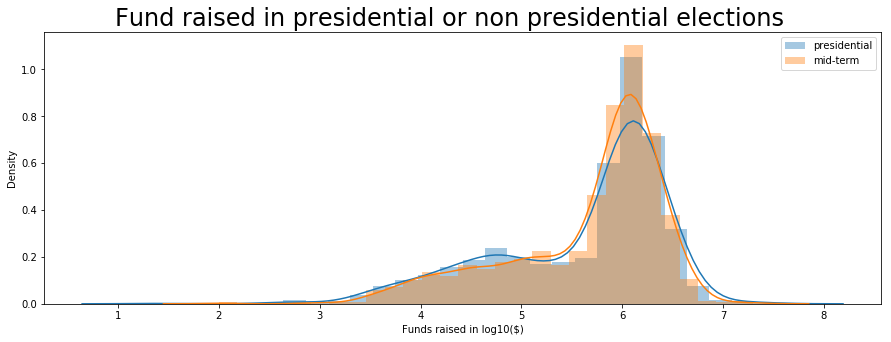

In [12]:
#fundraising
def fundraisingVsPresidentialYear(df):
    df_plt=df.dropna(subset=['fundraising', 'is_presidential_year']).copy()
    #df_plt.loc[df_plt['fundraising']<=0, 'fundraising']=1 #remove zero values
    df_plt=df_plt[df_plt['fundraising']>0]
    df_plt['fundraising']=np.log10(df_plt['fundraising']) #take the log10
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    fig.suptitle('Fund raised in presidential or non presidential elections', fontsize=24, y=0.95)
    #print(i, year)
    sns.distplot(df_plt[df_plt['is_presidential_year']==1]['fundraising'], ax=ax, label='presidential')
    sns.distplot(df_plt[df_plt['is_presidential_year']==0]['fundraising'], ax=ax, label='mid-term')
    #set x label
    ax.set_xlabel('Funds raised in log10($)')
    #set y label
    ax.set_ylabel('Density')
    #set title
    #ax[i].set_title('year {}'.format(year))
    #set legend
    ax.legend()
fundraisingVsPresidentialYear(data_train)

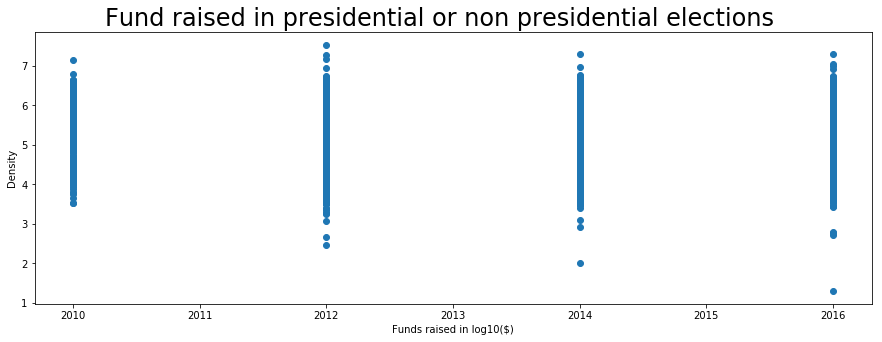

In [13]:
#let's try violin plots
def fundraisingVsYears(df):
    df_plt=df.dropna(subset=['fundraising', 'is_presidential_year']).copy()
    #df_plt.loc[df_plt['fundraising']<=0, 'fundraising']=1 #remove zero values
    df_plt=df_plt[df_plt['fundraising']>0]
    df_plt['fundraising']=np.log10(df_plt['fundraising']) #take the log10
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    fig.suptitle('Fund raised in presidential or non presidential elections', fontsize=24, y=0.95)
    #print(i, year)
    ax.scatter(df_plt['year'], df_plt['fundraising'])
    #set x label
    ax.set_xlabel('Funds raised in log10($)')
    #set y label
    ax.set_ylabel('Density')
    #set title
    #ax[i].set_title('year {}'.format(year))
    #set legend
    #ax.legend()
fundraisingVsYears(house_df[msk])

In [55]:
house_df_district_count=house_df.loc[house_df['year']==2017]
house_df_district_count.groupby(['state', 'district'])['name'].first()

house_df[(house_df['state']=='California')&(house_df['district']=='District 34')&(house_df['year']==2017)]

,district,is_incumbent,name,party,percent,state,votes,won,year,first_time_elected,count_victories,unemployement_rate,is_presidential_year,president_can_be_re_elected,president_party,president_overall_avg_job_approval,last_D_house_seats,last_R_house_seats,last_house_majority,fundraising
9122,District 34,0.0,Robert Lee Ahn,D,40.8,California,17610.0,0,2017,NaN,0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1658443.92
9126,District 34,0.0,Jimmy Gomez,D,59.2,California,25569.0,1,2017,2017.0,0,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1379556.75


In [59]:
#Baseline model 
house_df_grouped=house_df[(house_df['won']==1 & (house_df['year']!=2018)) ].groupby(['state', 'district', 'party'])['won'].count().reset_index(drop=False)
house_df_grouped=house_df_grouped.groupby(['state', 'district']).agg({'won':'max',      
                                     'party': 'first'})
house_df_grouped=house_df_grouped.reset_index(drop=False).drop('won', axis=1)
house_df_grouped.columns=['state', 'district', 'prediction']
house_df_grouped.join(house_df[(house_df['won']==1 & (house_df['year']==2018))], on=['state', 'district', 'won'])
#deductPartisanship(train_df).set_index(['state', 'district']), on=['state', 'district'])

ValueError: len(left_on) must equal the number of levels in the index of "right"

In [15]:
#count how many observations we have for each district. 
house_df_grouped=house_df[house_df['year']!=2018].groupby(['state', 'district'])['party'].count()
house_df_grouped.reset_index(drop=False).head()

,state,district,party
0,Alabama,District 1,12
1,Alabama,District 2,16
2,Alabama,District 3,16
3,Alabama,District 4,12
4,Alabama,District 5,14


In [60]:
wonParty=house_df[house_df['won']>0.5][['year','state', 'district', 'party']]
wonParty=wonParty.rename(index=str, columns={"party": "wonParty"})
house_df2=house_df.join(wonParty.set_index(['year', 'state', 'district']), on=['year', 'state', 'district'])
house_df2['R_vs_D_Seats']=house_df2['last_R_house_seats']/(house_df2['last_R_house_seats']+house_df2['last_D_house_seats']) #1=100% R, 0=100% D
len(house_df2)

9963

In [37]:
list(house_df2.drop('votes', axis=1).drop('last_R_house_seats', axis=1).drop('last_D_house_seats', axis=1).drop('percent', axis=1).drop('president_can_be_re_elected', axis=1).drop('year', axis=1).drop('is_presidential_year', axis=1).drop('won', axis=1).drop('first_time_elected', axis=1))

['district',
 'is_incumbent',
 'name',
 'party',
 'state',
 'count_victories',
 'unemployement_rate',
 'president_party',
 'president_overall_avg_job_approval',
 'last_house_majority',
 'fundraising',
 'wonParty',
 'Actual_R_PercentSeats']

In [ ]:
#sns.set(style="ticks")
#sns.pairplot(house_df2.drop('votes', axis=1).drop('last_R_house_seats', axis=1).drop('last_D_house_seats', axis=1).drop('percent', axis=1).drop('president_can_be_re_elected', axis=1).drop('year', axis=1).drop('is_presidential_year', axis=1).drop('won', axis=1).drop('first_time_elected', axis=1).fillna(0), hue="wonParty")
sns.pairplot(house_df2[['district',
 'is_incumbent',
 'name',
 'party',
 'state',
 'count_victories',
 'unemployement_rate',
 'president_party',
 'president_overall_avg_job_approval',
 'last_house_majority',
 'fundraising',
 'wonParty',
 'R_vs_D_Seats']].fillna(0), hue="wonParty")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


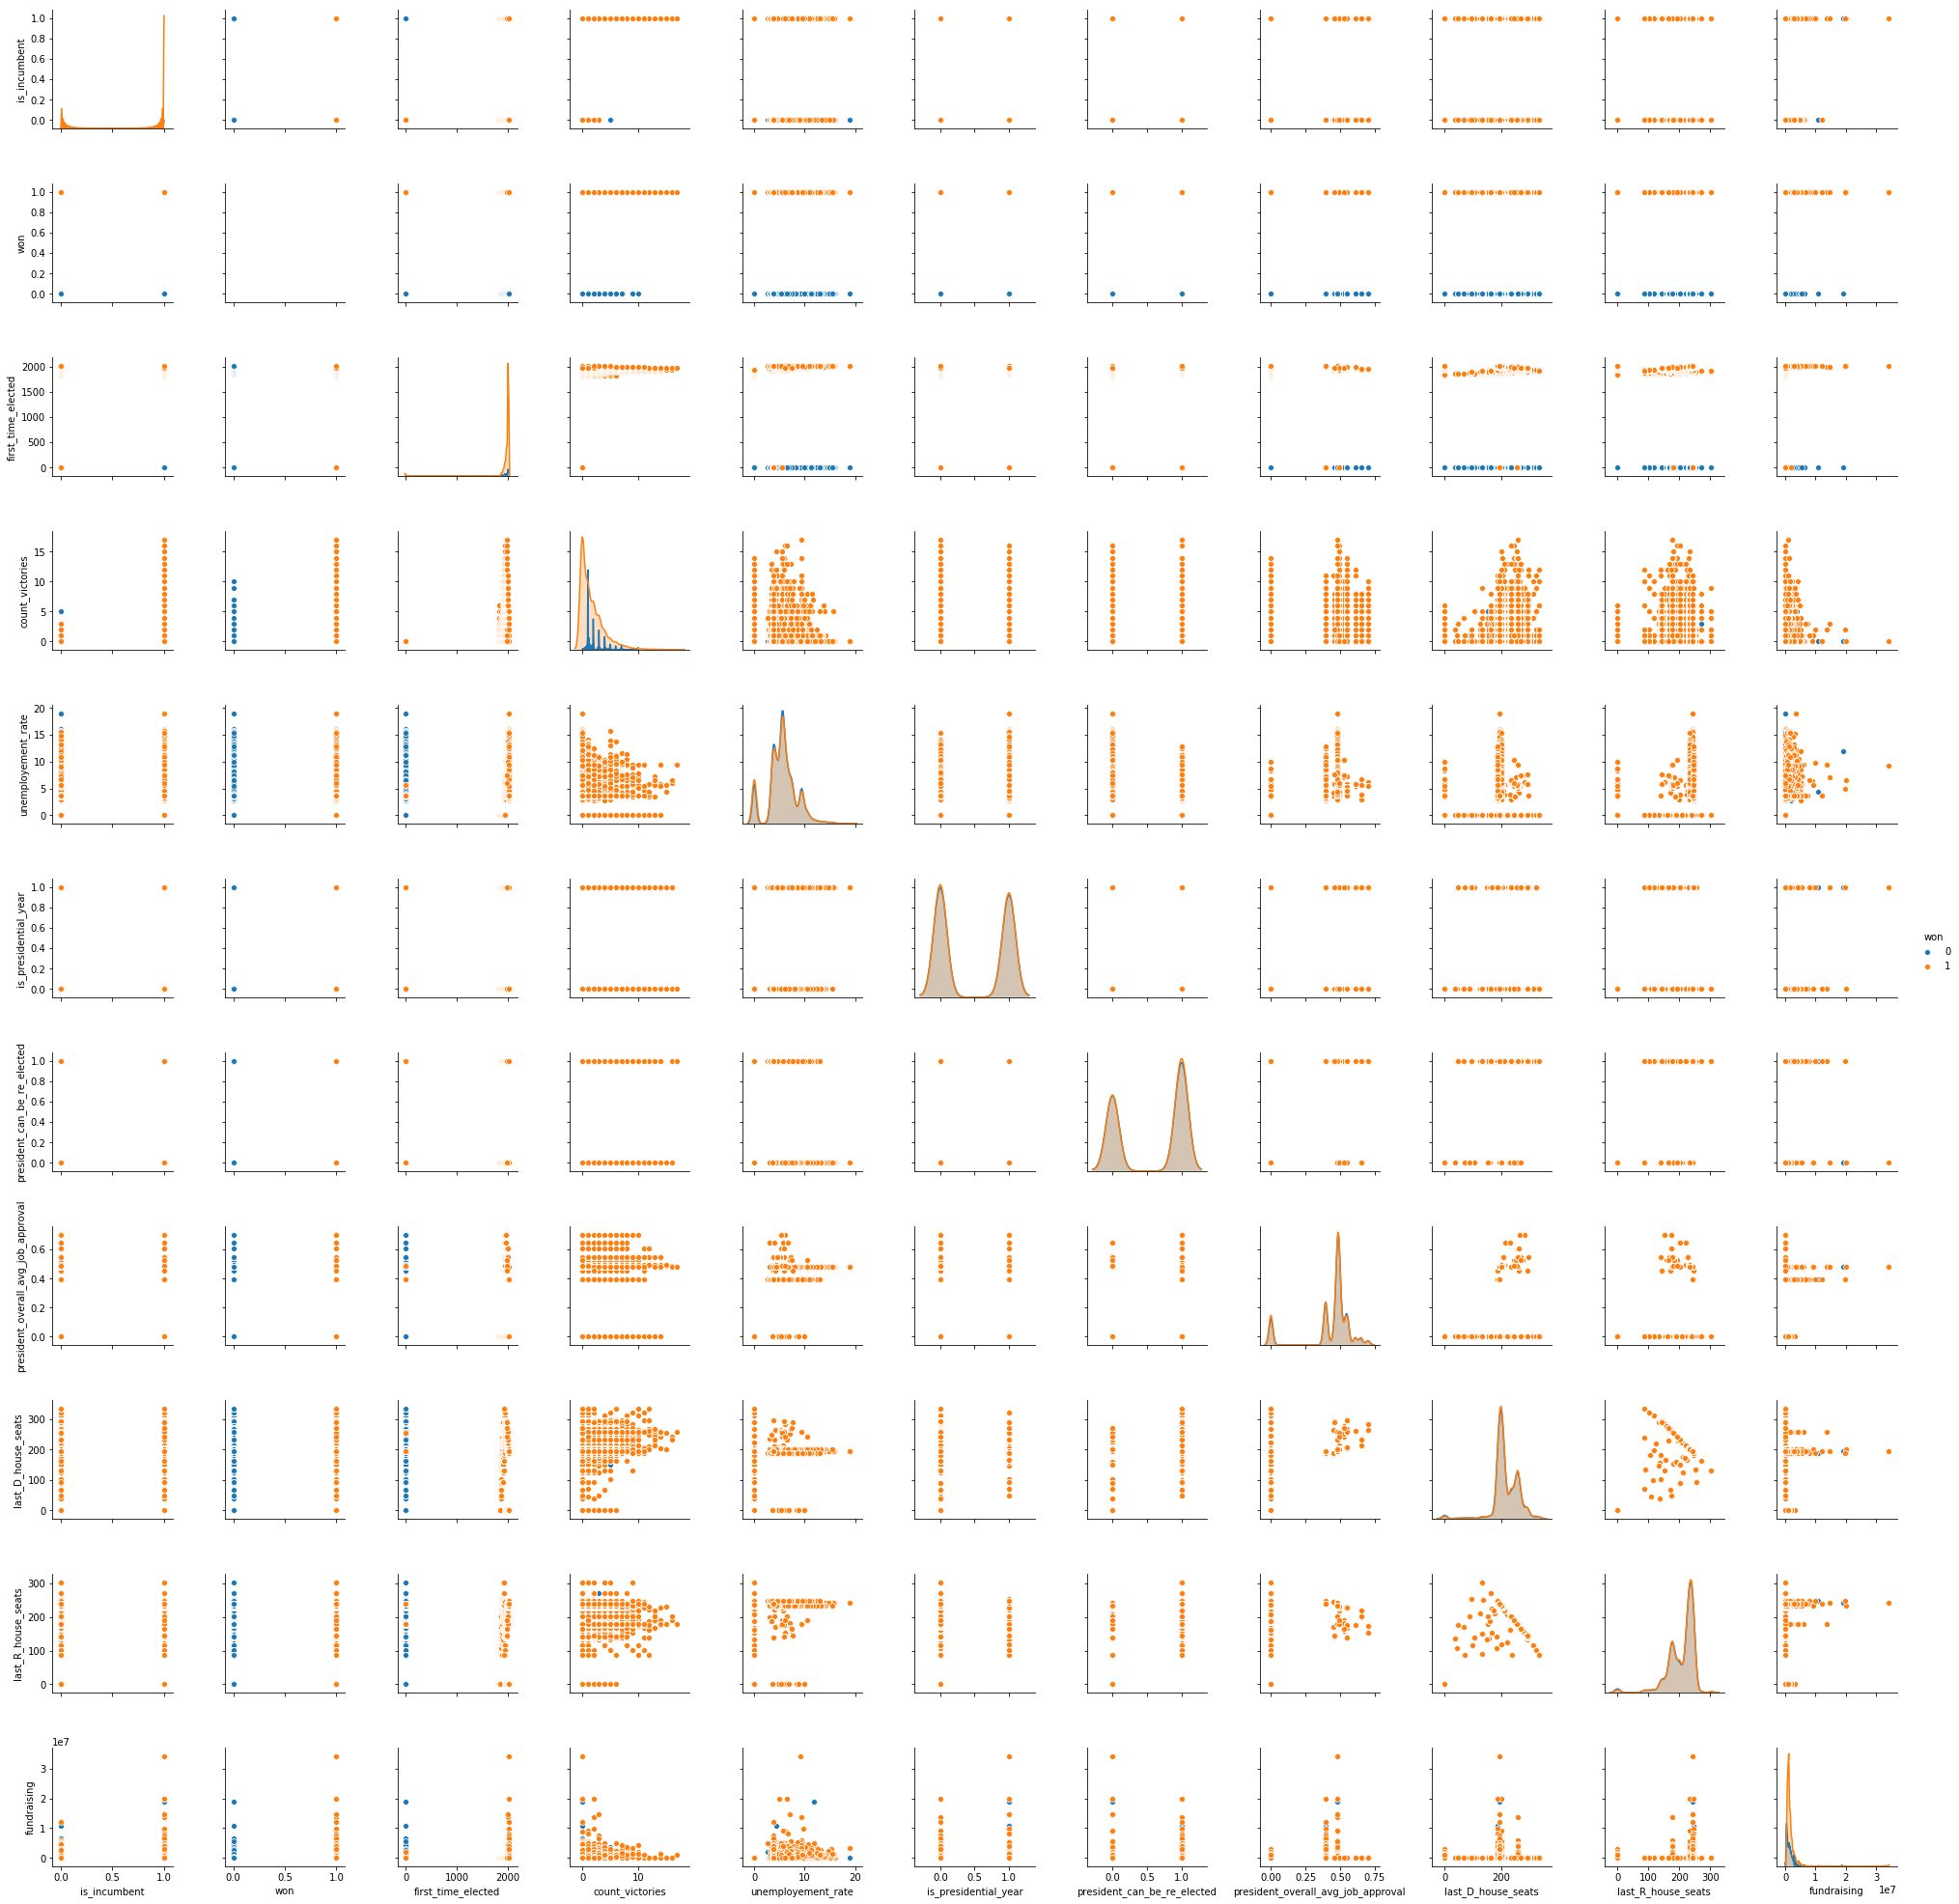

In [31]:

sns.pairplot(house_df2.drop('votes', axis=1).drop('percent', axis=1).drop('year', axis=1).fillna(0), hue="won")